In [1]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_json('covidData.json',lines = False)
df2 = pd.read_json('covidData2.json',lines = False)

In [3]:
df1.head()

,txn_date,province,new_case,total_case,update_date
0,2021-04-01,กระบี่,0,27,2021-08-19 07:39:31
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
2,2021-04-01,กาญจนบุรี,0,16,2021-08-19 07:39:31
3,2021-04-01,กาฬสินธุ์,0,4,2021-08-19 07:39:31
4,2021-04-01,กำแพงเพชร,0,2,2021-08-19 07:39:31


In [4]:
df1.shape

(11076, 5)

In [5]:
df2.head()

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN


In [6]:
df2.shape

(30342, 5)

In [7]:
data = [df1,df2]
Cdata = pd.concat(data)

Cdata.head()

,txn_date,province,new_case,total_case,update_date
0,2021-04-01,กระบี่,0,27,2021-08-19 07:39:31
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
2,2021-04-01,กาญจนบุรี,0,16,2021-08-19 07:39:31
3,2021-04-01,กาฬสินธุ์,0,4,2021-08-19 07:39:31
4,2021-04-01,กำแพงเพชร,0,2,2021-08-19 07:39:31


In [8]:
Cdata.shape

(41418, 5)

In [9]:
daily_case = Cdata.groupby(['txn_date']).sum()
daily_case.head()

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,2,4
2020-01-24,1,5
2020-01-25,1,6


In [10]:
daily_case.shape

(531, 2)

<AxesSubplot:title={'center':'Thailand Covid daily cases'}, xlabel='Date', ylabel='Cases'>

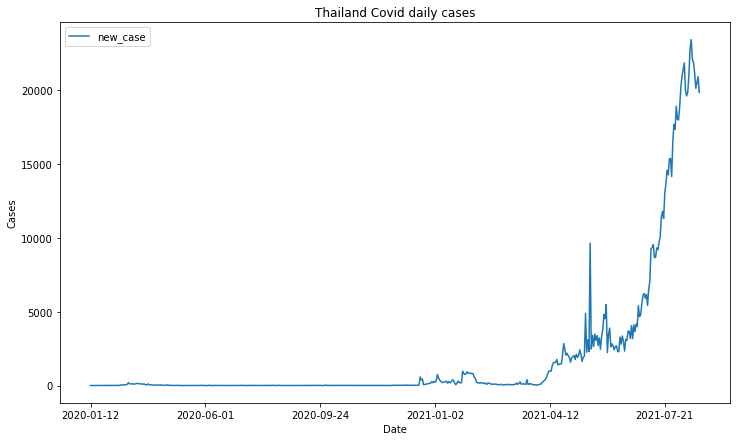

In [11]:
daily_case.plot(y='new_case',
                figsize = (12,7),
                title = "Thailand Covid daily cases",
               ylabel = 'Cases',
               xlabel = 'Date')

In [12]:
#get bangkok covid data
bangkok = Cdata[Cdata['province']=='กรุงเทพมหานคร']
print(bangkok.head())
print(bangkok.shape)

       txn_date       province  new_case  total_case          update_date
1    2021-04-01  กรุงเทพมหานคร        11        4855  2021-08-19 07:39:31
79   2021-04-02  กรุงเทพมหานคร        24        4879  2021-08-19 07:39:31
157  2021-04-03  กรุงเทพมหานคร        41        4920  2021-08-19 07:39:31
235  2021-04-04  กรุงเทพมหานคร        41        4961  2021-08-19 07:39:31
313  2021-04-05  กรุงเทพมหานคร        55        5016  2021-08-19 07:39:31
(531, 5)


In [13]:
bangkok_case = bangkok.groupby(['txn_date']).sum()
bangkok_case.head()

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,1,3
2020-01-24,0,3
2020-01-25,1,4


<AxesSubplot:title={'center':'Bangkok Daily cases'}, xlabel='Date', ylabel='Cases'>

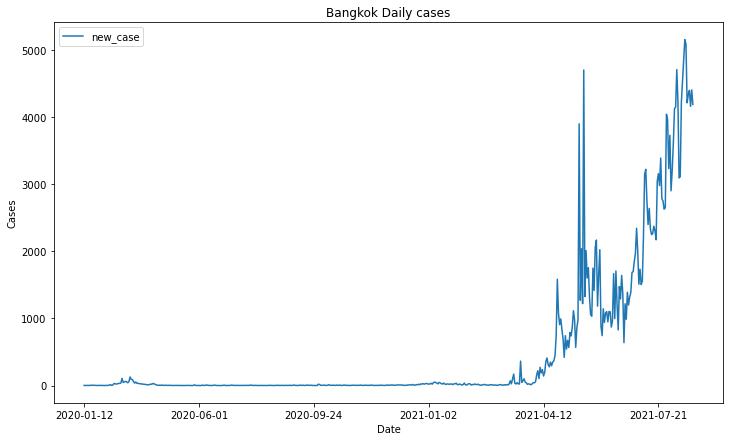

In [14]:
bangkok_case.plot(y = 'new_case',
                 figsize = (12,7),
                 title = 'Bangkok Daily cases',
                 ylabel = 'Cases',
                 xlabel = 'Date')

In [15]:
bangkok_aprilON = bangkok.groupby(['txn_date']).sum()
bangkok_aprilON = bangkok[bangkok['txn_date'] > '2021-04-01']
bangkok_aprilON.head()

,txn_date,province,new_case,total_case,update_date
79,2021-04-02,กรุงเทพมหานคร,24,4879,2021-08-19 07:39:31
157,2021-04-03,กรุงเทพมหานคร,41,4920,2021-08-19 07:39:31
235,2021-04-04,กรุงเทพมหานคร,41,4961,2021-08-19 07:39:31
313,2021-04-05,กรุงเทพมหานคร,55,5016,2021-08-19 07:39:31
391,2021-04-06,กรุงเทพมหานคร,157,5173,2021-08-19 07:39:31


<AxesSubplot:title={'center':'Bangkok April Onwards'}, xlabel='Date', ylabel='Cases'>

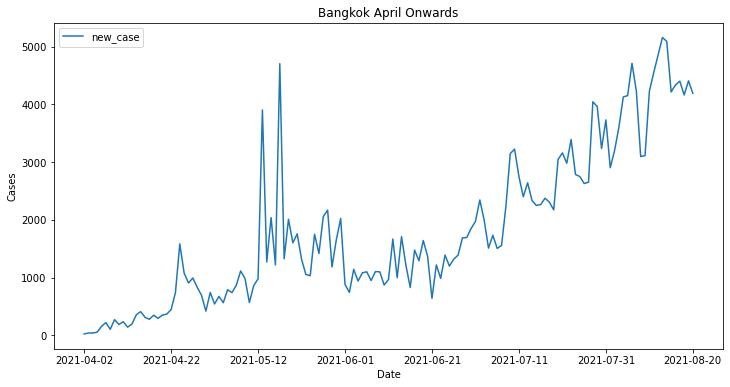

In [17]:
bangkok_aprilON.plot(x = 'txn_date', 
                     y = 'new_case',
                    figsize = (12,6),
                    title = 'Bangkok April Onwards',
                    xlabel = 'Date',
                    ylabel = 'Cases')